In [1]:
# Importing the dataset over per the archive site instructions
!pip install ucimlrepo
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [4]:
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [5]:
X.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [6]:
y.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


In [7]:
y.describe()

,Class
count,3810
unique,2
top,Osmancik
freq,2180


In [8]:
# Check for missing values
missing_values = pd.DataFrame(X).isnull().sum()
missing_values

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

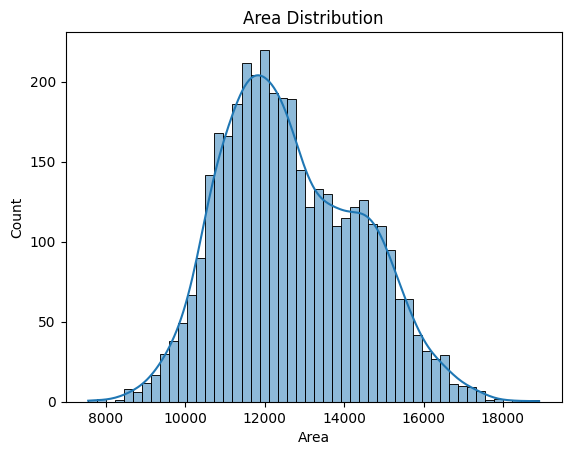

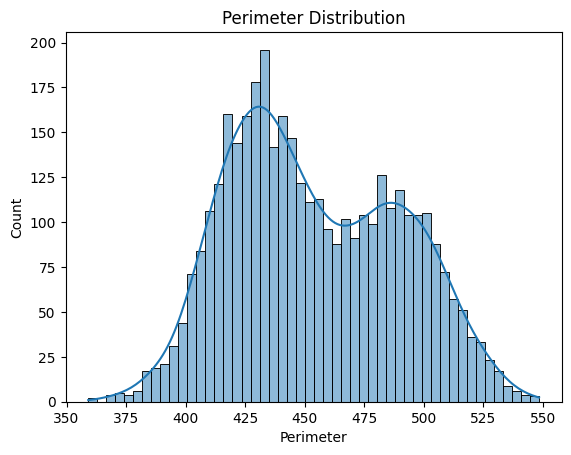

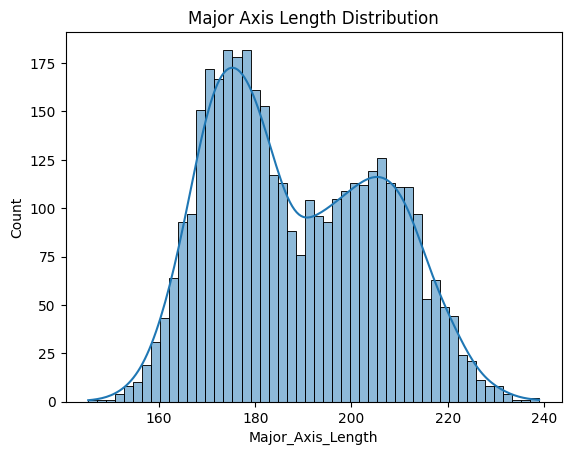

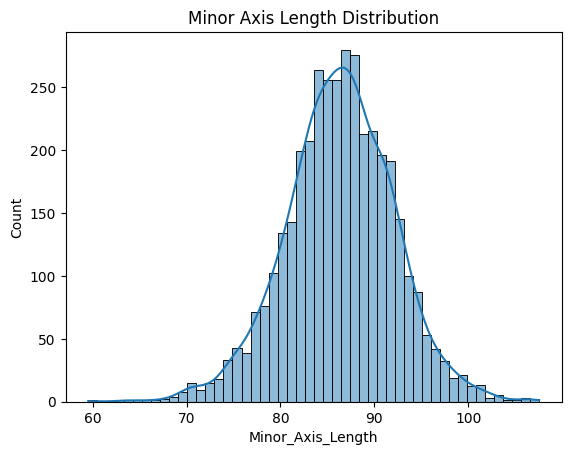

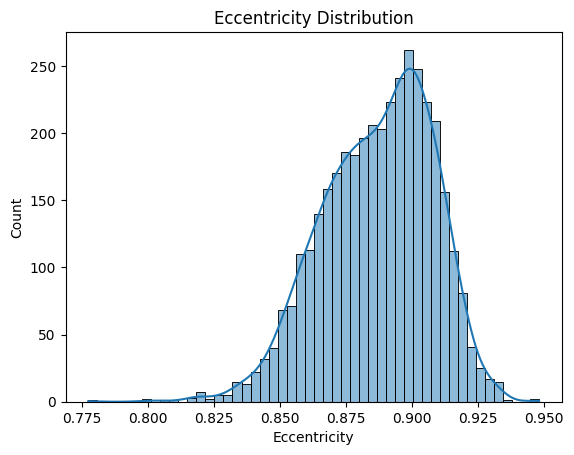

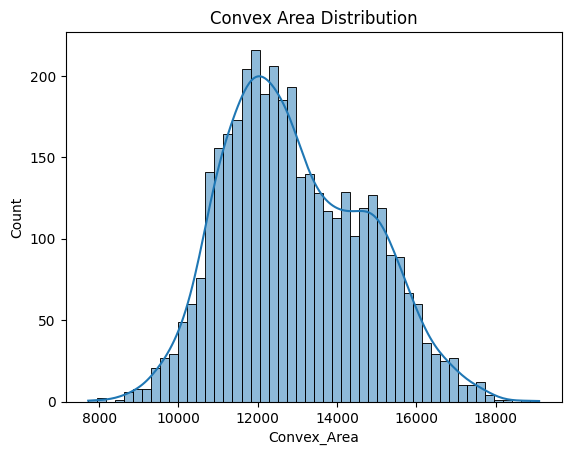

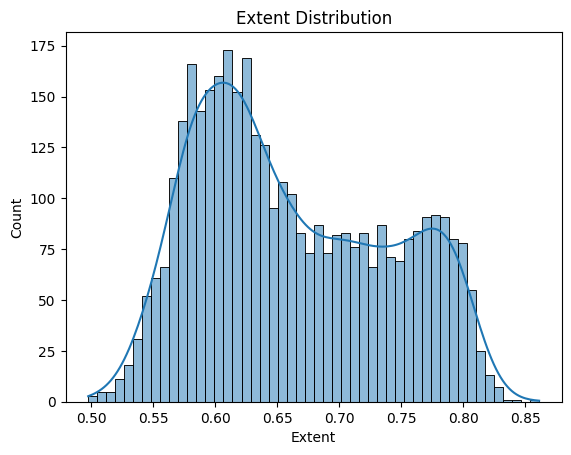

In [9]:
# PLot the data--they're basically all continuous or discrete variables
sns.histplot(X['Area'], bins=50, kde=True)
plt.title("Area Distribution")
plt.show()

sns.histplot(X['Perimeter'], bins=50, kde=True)
plt.title("Perimeter Distribution")
plt.show()

sns.histplot(X['Major_Axis_Length'], bins=50, kde=True)
plt.title("Major Axis Length Distribution")
plt.show()

sns.histplot(X['Minor_Axis_Length'], bins=50, kde=True)
plt.title("Minor Axis Length Distribution")
plt.show()

sns.histplot(X['Eccentricity'], bins=50, kde=True)
plt.title("Eccentricity Distribution")
plt.show()

sns.histplot(X['Convex_Area'], bins=50, kde=True)
plt.title("Convex Area Distribution")
plt.show()

sns.histplot(X['Extent'], bins=50, kde=True)
plt.title("Extent Distribution")
plt.show()

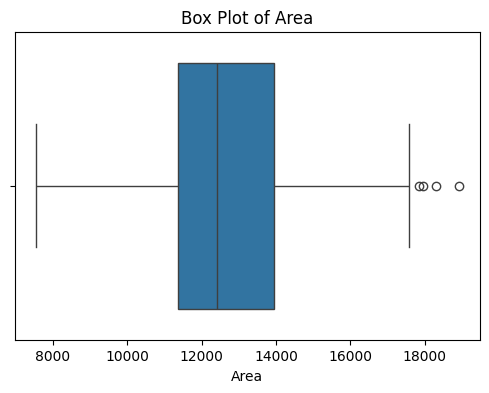

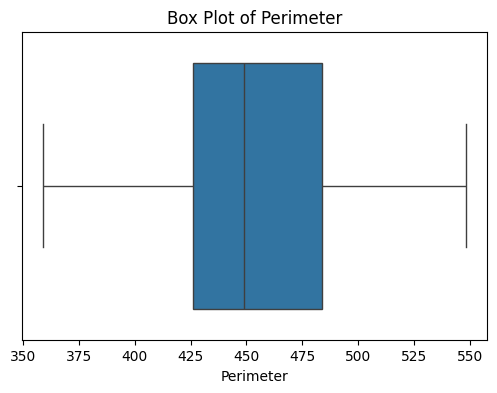

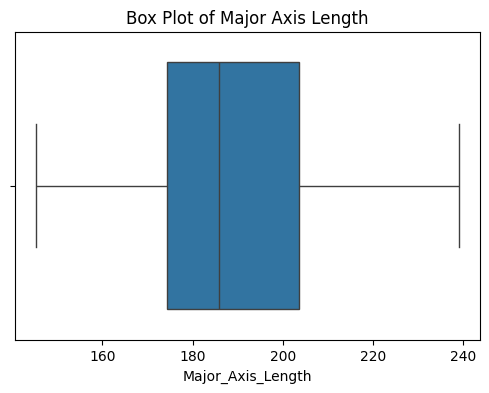

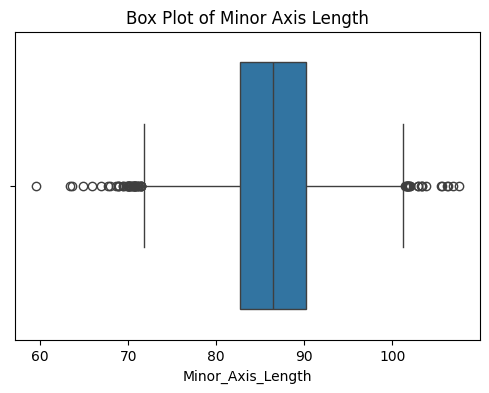

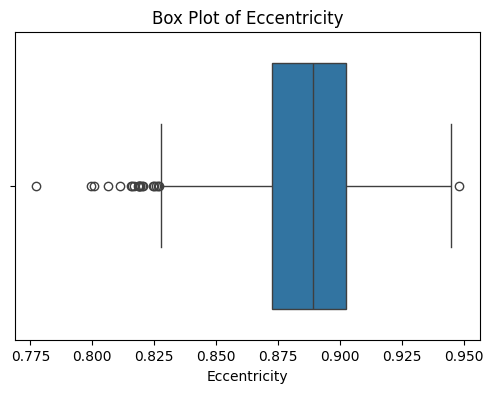

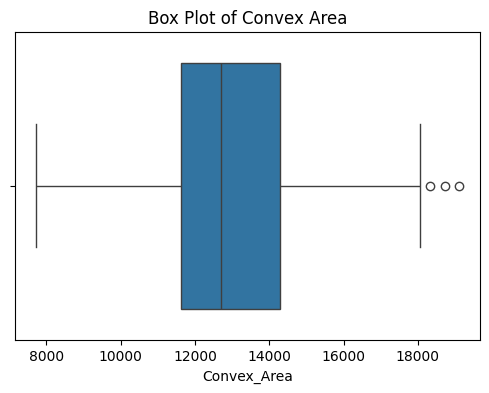

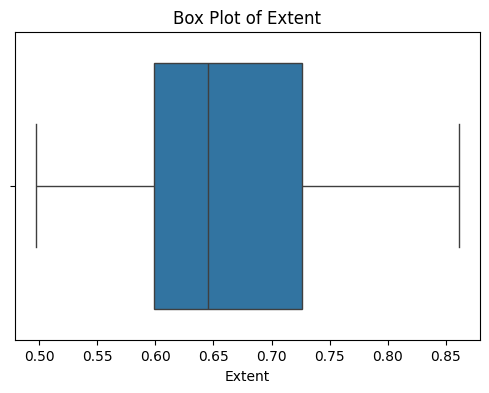

In [10]:
columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 
           'Eccentricity', 'Convex_Area', 'Extent']
X_df = pd.DataFrame(X, columns=columns)

# Box plots
plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Area'])
plt.title("Box Plot of Area")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Perimeter'])
plt.title("Box Plot of Perimeter")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Major_Axis_Length'])
plt.title("Box Plot of Major Axis Length")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Minor_Axis_Length'])
plt.title("Box Plot of Minor Axis Length")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Eccentricity'])
plt.title("Box Plot of Eccentricity")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Convex_Area'])
plt.title("Box Plot of Convex Area")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=X_df['Extent'])
plt.title("Box Plot of Extent")
plt.show()

In [11]:
# # Function to remove outliers using IQR
# def remove_outliers(df, target, col_list):
#     df_cleaned = df.copy()
#     target_cleaned = target.copy()
    
#     for col in col_list:
#         # Get the quartiles
#         q1 = df_cleaned[col].quantile(0.25)
#         q3 = df_cleaned[col].quantile(0.75)

#         # Get IQR by subtracting Q1 from Q3
#         IQR = q3 - q1

#         # Get bounds by formula - quartile +/- 1.5 * IQR
#         lower_bound = q1 - 1.5 * IQR
#         upper_bound = q3 + 1.5 * IQR

#         # Get index of non-outlier rows
#         valid_indices = (df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)

#         df_cleaned = df_cleaned[valid_indices]
#         target_cleaned = target_cleaned[valid_indices]

#     return df_cleaned, target_cleaned

# # Apply outlier removal on both X and y
# X_cleaned, y_cleaned = remove_outliers(X, y, X.columns)

In [12]:
y['Class'].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [13]:
# Resample with SMOTE to fix data imbalance
smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [14]:
# Normalise data
scaler_rice = StandardScaler()
X = scaler_rice.fit_transform(X)

# Separate training and test set (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# random_state=42 to ensure consistency across runs
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# squeeze() is to resolve the 2D structure of pandas DF
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train.squeeze())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [17]:
# Evaluate performance
best_rf = grid_search.best_estimator_
prediction = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(Y_test, prediction))
print("\nClassification Report:\n", classification_report(Y_test, prediction))

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}

Accuracy: 0.9369266055045872

Classification Report:
               precision    recall  f1-score   support

      Cammeo       0.96      0.92      0.94       465
    Osmancik       0.92      0.95      0.93       407

    accuracy                           0.94       872
   macro avg       0.94      0.94      0.94       872
weighted avg       0.94      0.94      0.94       872



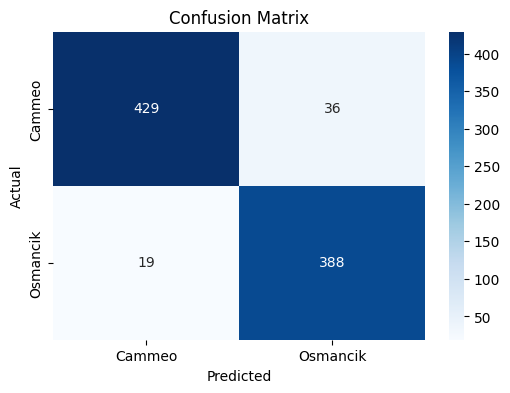

In [18]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, prediction), annot=True, fmt='d', cmap='Blues', xticklabels=["Cammeo", "Osmancik"], yticklabels=["Cammeo", "Osmancik"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()